# Analisi dati: andamento del cambio EUR-USD

Questi dati sono disponibili gratuitamente sul sito europa.eu

https://sdw.ecb.europa.eu/browseSelection.do?node=qview&SERIES_KEY=120.EXR.D.USD.EUR.SP00.A

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
origdf = pd.read_csv('eur_usd_change.csv', skiprows=4)
origdf    # questo e' il DataFrame originale

,Date,Value
0,2021-05-12,1.2118
1,2021-05-11,1.2170
2,2021-05-10,1.2169
3,2021-05-07,1.2059
4,2021-05-06,1.2060
...,...,...
5780,1999-01-08,1.1659
5781,1999-01-07,1.1632
5782,1999-01-06,1.1743
5783,1999-01-05,1.1790


In [3]:
origdf[origdf.Value == '-']    # alcune date hanno valori mancanti

,Date,Value
2308,2012-05-01,-
2324,2012-04-09,-
2325,2012-04-06,-
2399,2011-12-26,-
2574,2011-04-25,-
...,...,...
5269,2000-12-25,-
5439,2000-05-01,-
5444,2000-04-24,-
5445,2000-04-21,-


In [4]:
origdf[origdf.Value != '-']    # cosi' eliminiamo le righe che non ci interessano

,Date,Value
0,2021-05-12,1.2118
1,2021-05-11,1.2170
2,2021-05-10,1.2169
3,2021-05-07,1.2059
4,2021-05-06,1.2060
...,...,...
5780,1999-01-08,1.1659
5781,1999-01-07,1.1632
5782,1999-01-06,1.1743
5783,1999-01-05,1.1790


In [17]:
# queste "conversioni di tipo" servono per facilitare la manipolazione dei dati
df = origdf
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')   # ignora i valori non numerici
df.set_index('Date')
df

,Date,Value
0,2021-05-12,1.2118
1,2021-05-11,1.2170
2,2021-05-10,1.2169
3,2021-05-07,1.2059
4,2021-05-06,1.2060
...,...,...
5780,1999-01-08,1.1659
5781,1999-01-07,1.1632
5782,1999-01-06,1.1743
5783,1999-01-05,1.1790


In [14]:
def grafico(x, y):
    # crea un grafico dai dati in x e y
    plt.subplots(figsize=(20, 6)) 
    #plt.scatter(x, y)   # segna i punti
    plt.plot(x, y)   # traccia la linea
    plt.grid(which='major')
    plt.title("Cambio EUR-USD")
    plt.show()

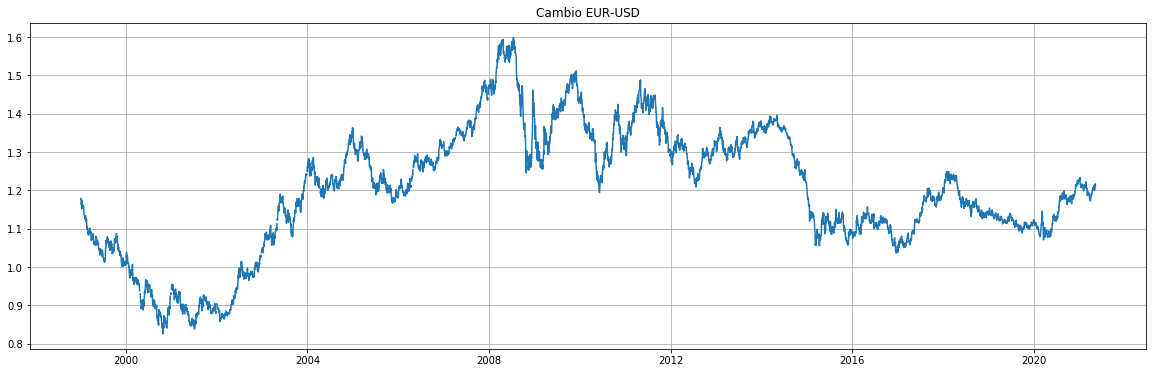

In [16]:
# grafico di tutti i punti
grafico(df.Date, df.Value)

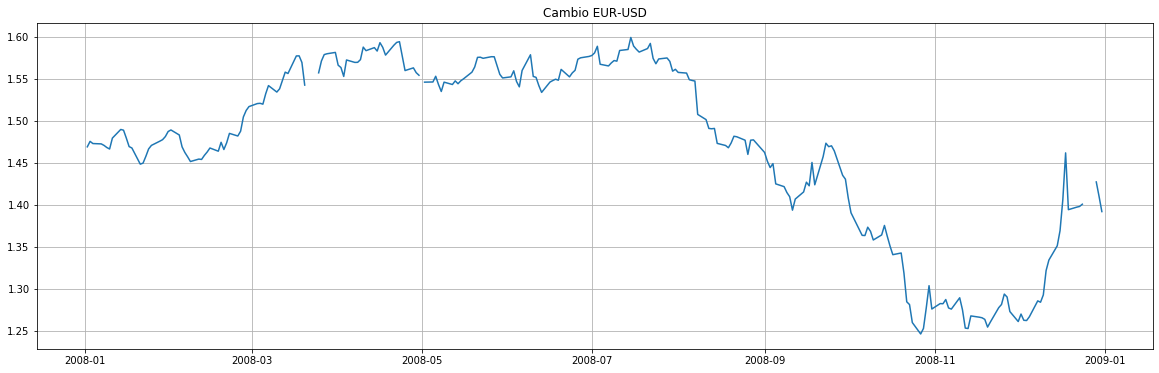

In [30]:
# grafico dei punti del 2008
df08 = df[(df.Date >= datetime.datetime(2008, 1, 1)) & (df.Date <= datetime.datetime(2008, 12, 31))]
grafico(df08.Date, df08.Value)

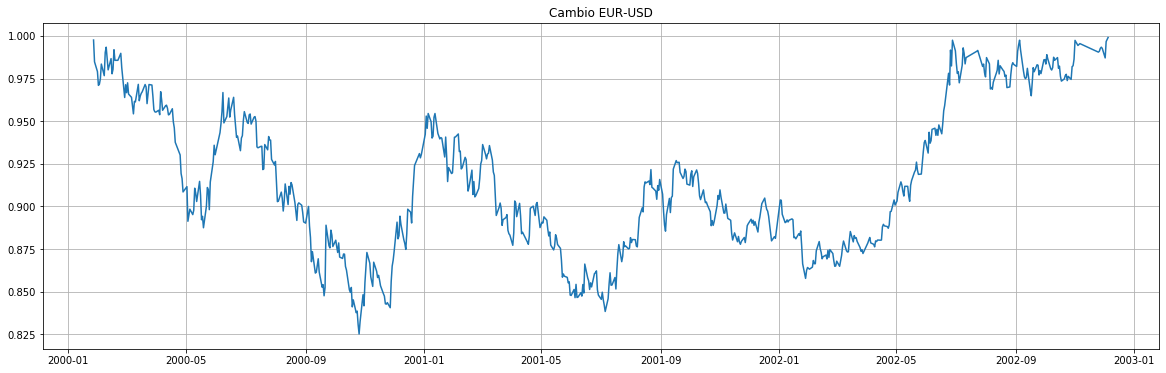

In [31]:
# grafico dei punti sotto la parita'
dfsotto1 = df[df.Value <= 1]
grafico(dfsotto1.Date, dfsotto1.Value)